“서울 5대 권역은 상권의 성격이 다르므로, 소비 항목(교육·여가·의료·교통)의 비중 역시 지역 특성에 따라 구조적으로 달라질 것이다.”

귀무가설(H₀)

서울 5대 권역의 상권 간 소비 항목 비중(교육·여가·의료·교통) 에는 구조적 차이가 없다.
즉, 권역이 달라져도 소비 항목 비중의 평균은 동일하다.

대립가설(H₁)

서울 5대 권역의 상권 간 소비 항목 비중에는 유의미한 차이가 존재하며,
특정 권역은 특정 소비 항목에서 상대적으로 더 높은 비중을 보인다.

즉, 상권의 구조적 특성(상업지/주거지역 여부, 업종 구성, 유동 인구 특성 등)에 따라
교육·여가·의료·교통 등 소비 항목 비중이 유의미하게 달라진다.

<연구 목적>

본 연구의 목적은 다음과 같다.

서울시 5대 권역의 상권에서 소비 구조(소비 항목별 비중)의 차이가 존재하는지 검정한다.

차이가 존재할 경우 어떤 소비 항목에서, 어떤 권역이 다른 권역보다 유의하게 높은지 파악한다.


# 기본

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# 폰트 설치하기
!pip install statsmodels

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# Add this line to ensure matplotlib uses the installed font for all text
mpl.rcParams['font.family'] = 'NanumBarunGothic'
mpl.rcParams['axes.unicode_minus'] = False # To prevent breaking minus signs

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트매니저
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

# 나눔고딕 폰트
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (6,265 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117528 files and direc

# 데이터 불러오기

In [ ]:
# 데이터 불러오기
df = pd.read_csv('/content/drive/MyDrive/서울시 상권분석서비스(소득소비-자치구).csv', encoding="cp949")
print(df.head())

   기준_년분기_코드  행정동_코드 행정동_코드_명  월_평균_소득_금액  소득_구간_코드        지출_총금액  \
0      20242   11215      광진구     3192971         7  100541241000   
1      20242   11500      강서구     3160623         7  231352477000   
2      20242   11740      강동구     3292857         7  157864735000   
3      20243   11260      중랑구     2598785         6   24488372000   
4      20243   11470      양천구     3796034         8   40012838000   

    식료품_지출_총금액  의류_신발_지출_총금액  생활용품_지출_총금액   의료비_지출_총금액    교통_지출_총금액  \
0  22634699000    3375381000   1864827000  15005146000   5961023000   
1  34067640000    6533371000   2276283000  32773565000  33678827000   
2  23331462000    2428563000   1590537000  21974063000   3736967000   
3   7415487000     384896000    486318000   4031113000   1791594000   
4   9217440000     398730000    389703000   8155027000   2268938000   

    교육_지출_총금액   유흥_지출_총금액  여가_문화_지출_총금액    기타_지출_총금액    음식_지출_총금액  
0  3393363000  4281862000    6687173000   5054612000  32283155000  
1  6986997000  4639547

In [ ]:
df.columns

Index(['기준_년분기_코드', '행정동_코드', '행정동_코드_명', '월_평균_소득_금액', '소득_구간_코드', '지출_총금액',
       '식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액',
       '교육_지출_총금액', '유흥_지출_총금액', '여가_문화_지출_총금액', '기타_지출_총금액', '음식_지출_총금액'],
      dtype='object')

# 데이터 전처리

In [ ]:
df = df.rename(columns={
    "기준_년분기_코드": "분기",
    "행정동_코드_명": "행정동",
    "월_평균_소득_금액": "월평균소득",
    "지출_총금액": "총지출"
})

In [ ]:
df.describe()

,분기,행정동_코드,월평균소득,소득_구간_코드,총지출,식료품_지출_총금액,의류_신발_지출_총금액,생활용품_지출_총금액,의료비_지출_총금액,교통_지출_총금액,교육_지출_총금액,유흥_지출_총금액,여가_문화_지출_총금액,기타_지출_총금액,음식_지출_총금액
count,650.000000,650.000000,6.500000e+02,650.000000,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02,6.500000e+02
mean,20220.115385,11416.600000,3.425900e+06,7.098462,3.820714e+11,2.653835e+10,4.473227e+09,3.958141e+09,2.340660e+10,2.732057e+10,6.608084e+09,3.237529e+09,2.136266e+11,4.713274e+10,2.576959e+10
std,18.789088,186.485772,6.171334e+05,0.848908,6.274679e+11,2.173763e+10,5.692479e+09,7.286245e+09,2.613166e+10,7.565638e+10,6.939026e+09,2.211439e+09,4.613726e+11,1.542833e+11,1.512877e+10
min,20191.000000,11110.000000,2.547460e+06,6.000000,1.662135e+10,4.588293e+09,2.813970e+08,2.598150e+08,1.854443e+09,1.478890e+08,5.103760e+08,4.226860e+08,1.015924e+09,6.456530e+08,4.103144e+09
25%,20203.000000,11260.000000,2.994059e+06,7.000000,7.645706e+10,1.606711e+10,1.412320e+09,1.314821e+09,9.566184e+09,3.273809e+09,2.597143e+09,1.845466e+09,4.316698e+09,2.692608e+09,1.613651e+10
50%,20221.500000,11410.000000,3.292857e+06,7.000000,1.265804e+11,2.206069e+10,2.394151e+09,1.754999e+09,1.472472e+10,4.732486e+09,3.833611e+09,2.704967e+09,1.139477e+10,3.795082e+09,2.133612e+10
75%,20234.000000,11560.000000,3.757774e+06,8.000000,2.714873e+11,2.896869e+10,5.082732e+09,2.703366e+09,2.134249e+10,8.072430e+09,8.300434e+09,3.962195e+09,9.361762e+10,1.767615e+10,3.135561e+10
max,20252.000000,11740.000000,5.127603e+06,9.000000,3.099456e+12,1.562579e+11,3.723681e+10,6.719321e+10,1.517878e+11,4.693053e+11,4.125386e+10,1.570764e+10,2.427277e+12,9.491272e+11,9.148956e+10


In [ ]:
# 데이터 타입 확인 & 변환
df["분기"] = df["분기"].astype(str)

In [ ]:
# 결측치 확인
df.isnull().sum()

,0
분기,0
행정동_코드,0
행정동,0
월평균소득,0
소득_구간_코드,0
총지출,0
식료품_지출_총금액,0
의류_신발_지출_총금액,0
생활용품_지출_총금액,0
의료비_지출_총금액,0


In [ ]:
# 자치구(구) 변수 다시 만들기 (행정동 ->구 매핑)
# 행정동 코드에서 “자치구 코드(앞 5자리)” 뽑기
df['자치구코드'] = df['행정동_코드'].astype(str).str[:5]

In [ ]:
# 자치구코드 → 자치구명 매핑
gu_map = {
    '11110': '종로구', '11140': '중구', '11170': '용산구',
    '11200': '성동구', '11215': '광진구', '11230': '동대문구',
    '11260': '중랑구', '11290': '성북구', '11305': '강북구',
    '11320': '도봉구', '11350': '노원구', '11380': '은평구',
    '11410': '서대문구', '11440': '마포구', '11470': '양천구',
    '11500': '강서구', '11530': '구로구', '11545': '금천구',
    '11560': '영등포구', '11590': '동작구', '11620': '관악구',
    '11650': '서초구', '11680': '강남구', '11710': '송파구',
    '11740': '강동구'
}

df['구'] = df['자치구코드'].map(gu_map)

In [ ]:
# 구 → 권역 만들기 (분석 그룹용)
region_map = {
    '종로구': '도심권', '중구': '도심권', '용산구': '도심권',

    '은평구': '서북권', '서대문구': '서북권', '마포구': '서북권',

    '성북구': '동북권', '강북구': '동북권', '도봉구': '동북권',
    '노원구': '동북권', '동대문구': '동북권', '중랑구': '동북권',
    '성동구': '동북권', '광진구': '동북권',

    '강남구': '동남권', '서초구': '동남권', '송파구': '동남권',
    '강동구': '동남권',

    '영등포구': '서남권', '동작구': '서남권', '관악구': '서남권',
    '금천구': '서남권', '구로구': '서남권', '강서구': '서남권',
    '양천구': '서남권'
}

df['권역'] = df['구'].map(region_map)

In [ ]:
# 소비 항목 비중(0~1) 만들기
df['교육비중'] = df['교육_지출_총금액'] / df['총지출']
df['여가비중'] = df['여가_문화_지출_총금액'] / df['총지출']
df['의료비중'] = df['의료비_지출_총금액'] / df['총지출']
df['교통비중'] = df['교통_지출_총금액'] / df['총지출']

ratio_cols = ['교육비중', '여가비중', '의료비중', '교통비중']

In [ ]:
# 권역별로 이상치 탐색(IQR 방식) -> 근데 우리 for문 안배워서.... 밑에있는걸로 합시다..!!
def find_outliers(sub):
    out_idx = set()
    for col in ratio_cols:
        Q1 = sub[col].quantile(0.25)
        Q3 = sub[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        idx = sub[(sub[col] < lower) | (sub[col] > upper)].index
        out_idx.update(idx)
    return list(out_idx)

In [ ]:
# 동북권 이상치 탐색(IQR 방식)
sub = df[df['권역'] == '동북권']

outlier_idx = []

# 교육비중
q1 = sub['교육비중'].quantile(.25)
q3 = sub['교육비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['교육비중'] < lower) | (sub['교육비중'] > upper)].index))

# 여가비중
q1 = sub['여가비중'].quantile(.25)
q3 = sub['여가비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['여가비중'] < lower) | (sub['여가비중'] > upper)].index))

# 의료비중
q1 = sub['의료비중'].quantile(.25)
q3 = sub['의료비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['의료비중'] < lower) | (sub['의료비중'] > upper)].index))

# 교통비중
q1 = sub['교통비중'].quantile(.25)
q3 = sub['교통비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['교통비중'] < lower) | (sub['교통비중'] > upper)].index))

outlier_idx = list(set(outlier_idx))

print("동북권 이상치 구 목록:")
print(sub.loc[outlier_idx, '구'].tolist())

동북권 이상치 구 목록:
['성동구', '동대문구', '성동구', '동대문구', '동대문구', '성동구', '동대문구', '동대문구', '동대문구', '성동구', '동대문구', '동대문구', '동대문구', '동대문구', '성동구', '동대문구', '동대문구', '동대문구', '동대문구', '성동구', '성동구', '동대문구', '동대문구', '동대문구', '동대문구', '노원구', '노원구', '동대문구', '성동구', '성동구', '동대문구', '동대문구', '노원구']


In [ ]:
# 서남권 이상치 탐색(IQR 방식)
sub = df[df['권역'] == '서남권']

outlier_idx = []

# 교육비중
q1 = sub['교육비중'].quantile(.25)
q3 = sub['교육비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['교육비중'] < lower) | (sub['교육비중'] > upper)].index))

# 여가비중
q1 = sub['여가비중'].quantile(.25)
q3 = sub['여가비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['여가비중'] < lower) | (sub['여가비중'] > upper)].index))

# 의료비중
q1 = sub['의료비중'].quantile(.25)
q3 = sub['의료비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['의료비중'] < lower) | (sub['의료비중'] > upper)].index))

# 교통비중
q1 = sub['교통비중'].quantile(.25)
q3 = sub['교통비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['교통비중'] < lower) | (sub['교통비중'] > upper)].index))

outlier_idx = list(set(outlier_idx))

print("서남권 이상치 구 목록:")
print(sub.loc[outlier_idx, '구'].tolist())

서남권 이상치 구 목록:
['강서구', '양천구', '양천구', '구로구', '관악구', '구로구', '관악구', '동작구', '동작구', '구로구', '관악구', '양천구', '동작구', '구로구', '양천구', '관악구', '동작구', '양천구', '양천구', '구로구', '영등포구', '관악구', '구로구', '관악구', '양천구', '동작구', '양천구', '동작구', '양천구', '구로구', '관악구', '양천구', '구로구', '동작구', '관악구', '양천구', '구로구', '동작구', '관악구', '양천구', '구로구', '동작구', '영등포구', '관악구', '동작구', '구로구', '관악구', '동작구', '양천구', '구로구', '영등포구', '관악구', '동작구', '강서구', '양천구', '구로구', '영등포구', '관악구', '동작구', '강서구', '양천구', '구로구', '영등포구', '관악구', '동작구', '강서구', '양천구', '구로구', '영등포구', '관악구', '동작구', '강서구', '양천구', '구로구', '영등포구', '관악구', '동작구', '강서구', '양천구', '구로구', '영등포구', '관악구', '동작구', '양천구', '구로구', '관악구', '동작구', '양천구', '구로구', '관악구', '동작구', '양천구', '구로구', '동작구', '양천구', '관악구', '양천구', '구로구', '영등포구', '관악구', '동작구', '구로구', '관악구', '동작구', '구로구', '관악구', '동작구', '구로구', '동작구', '양천구', '관악구', '구로구', '동작구', '양천구', '관악구', '구로구', '영등포구', '관악구', '동작구']


In [ ]:
# 동남권 이상치 탐색(IQR 방식)
sub = df[df['권역'] == '동남권']

outlier_idx = []

# 교육비중
q1 = sub['교육비중'].quantile(.25)
q3 = sub['교육비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['교육비중'] < lower) | (sub['교육비중'] > upper)].index))

# 여가비중
q1 = sub['여가비중'].quantile(.25)
q3 = sub['여가비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['여가비중'] < lower) | (sub['여가비중'] > upper)].index))

# 의료비중
q1 = sub['의료비중'].quantile(.25)
q3 = sub['의료비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['의료비중'] < lower) | (sub['의료비중'] > upper)].index))

# 교통비중
q1 = sub['교통비중'].quantile(.25)
q3 = sub['교통비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['교통비중'] < lower) | (sub['교통비중'] > upper)].index))

outlier_idx = list(set(outlier_idx))

print("동남권 이상치 구 목록:")
print(sub.loc[outlier_idx, '구'].tolist())

동남권 이상치 구 목록:
['송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구', '송파구']


In [ ]:
# 서북권 이상치 탐색(IQR 방식)
sub = df[df['권역'] == '서북권']

outlier_idx = []

# 교육비중
q1 = sub['교육비중'].quantile(.25)
q3 = sub['교육비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['교육비중'] < lower) | (sub['교육비중'] > upper)].index))

# 여가비중
q1 = sub['여가비중'].quantile(.25)
q3 = sub['여가비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['여가비중'] < lower) | (sub['여가비중'] > upper)].index))

# 의료비중
q1 = sub['의료비중'].quantile(.25)
q3 = sub['의료비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['의료비중'] < lower) | (sub['의료비중'] > upper)].index))

# 교통비중
q1 = sub['교통비중'].quantile(.25)
q3 = sub['교통비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['교통비중'] < lower) | (sub['교통비중'] > upper)].index))

outlier_idx = list(set(outlier_idx))

print("서북권 이상치 구 목록:")
print(sub.loc[outlier_idx, '구'].tolist())

서북권 이상치 구 목록:
[]


In [ ]:
# 도심권 이상치 탐색(IQR 방식)
sub = df[df['권역'] == '도심권']

outlier_idx = []

# 교육비중
q1 = sub['교육비중'].quantile(.25)
q3 = sub['교육비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['교육비중'] < lower) | (sub['교육비중'] > upper)].index))

# 여가비중
q1 = sub['여가비중'].quantile(.25)
q3 = sub['여가비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['여가비중'] < lower) | (sub['여가비중'] > upper)].index))

# 의료비중
q1 = sub['의료비중'].quantile(.25)
q3 = sub['의료비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['의료비중'] < lower) | (sub['의료비중'] > upper)].index))

# 교통비중
q1 = sub['교통비중'].quantile(.25)
q3 = sub['교통비중'].quantile(.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
outlier_idx.extend(list(sub[(sub['교통비중'] < lower) | (sub['교통비중'] > upper)].index))

outlier_idx = list(set(outlier_idx))

print("도심권 이상치 구 목록:")
print(sub.loc[outlier_idx, '구'].tolist())

도심권 이상치 구 목록:
['종로구', '종로구', '종로구', '종로구', '종로구', '종로구', '종로구', '종로구', '종로구', '종로구', '종로구']


In [ ]:
df.groupby('권역')[['교육비중','여가비중','의료비중','교통비중']].agg(['mean','std','min','max'])


교육비중                                    여가비중                      \
         mean       std       min       max      mean       std       min   
권역                                                                          
도심권  0.011518  0.008673  0.004869  0.046077  0.391142  0.298068  0.068975   
동남권  0.029851  0.013521  0.012074  0.056549  0.397979  0.146920  0.114823   
동북권  0.044230  0.014721  0.023063  0.086920  0.072181  0.022318  0.038383   
서남권  0.042354  0.046132  0.001911  0.151578  0.277014  0.329519  0.023019   
서북권  0.032417  0.018911  0.006949  0.067132  0.295395  0.367353  0.022907   

                   의료비중                                    교통비중            \
          max      mean       std       min       max      mean       std   
권역                                                                          
도심권  0.799012  0.034731  0.034191  0.004682  0.112479  0.066014  0.073588   
동남권  0.590554  0.114767  0.047772  0.048649  0.216122  0.023700  0.015738   
동북권  0.152957  0.158190  0.036979  0.103692  0.275727  0.069668  0.021917   
서남권  0.954283  0.107377  0.069125  0.012519  0.322766  0.155347  0.194438   
서북권  0.905172  0.272602  0.237915  0.013532  0.682504  0.026333  0.020705   

                         
          min       max  
권역                       
도심권  0.000555  0.231633  
동남권  0.009268  0.063503  
동북권  0.027497  0.142177  
서남권  0.001963  0.575496  
서북권  0.002711  0.064068

In [ ]:
from scipy.stats import levene

# 교육비중
print("교육비중 Levene Test:")
print(levene(
    df[df['권역']=='도심권']['교육비중'],
    df[df['권역']=='동남권']['교육비중'],
    df[df['권역']=='동북권']['교육비중'],
    df[df['권역']=='서남권']['교육비중'],
    df[df['권역']=='서북권']['교육비중']
))

# 여가비중
print("\n여가비중 Levene Test:")
print(levene(
    df[df['권역']=='도심권']['여가비중'],
    df[df['권역']=='동남권']['여가비중'],
    df[df['권역']=='동북권']['여가비중'],
    df[df['권역']=='서남권']['여가비중'],
    df[df['권역']=='서북권']['여가비중']
))

# 의료비중
print("\n의료비중 Levene Test:")
print(levene(
    df[df['권역']=='도심권']['의료비중'],
    df[df['권역']=='동남권']['의료비중'],
    df[df['권역']=='동북권']['의료비중'],
    df[df['권역']=='서남권']['의료비중'],
    df[df['권역']=='서북권']['의료비중']
))

# 교통비중
print("\n교통비중 Levene Test:")
print(levene(
    df[df['권역']=='도심권']['교통비중'],
    df[df['권역']=='동남권']['교통비중'],
    df[df['권역']=='동북권']['교통비중'],
    df[df['권역']=='서남권']['교통비중'],
    df[df['권역']=='서북권']['교통비중']
))


교육비중 Levene Test:
LeveneResult(statistic=np.float64(25.676705074735768), pvalue=np.float64(9.135712039370419e-20))

여가비중 Levene Test:
LeveneResult(statistic=np.float64(38.90493710299378), pvalue=np.float64(3.40461746258076e-29))

의료비중 Levene Test:
LeveneResult(statistic=np.float64(110.84846377106359), pvalue=np.float64(6.939420350697697e-72))

교통비중 Levene Test:
LeveneResult(statistic=np.float64(46.76296735379847), pvalue=np.float64(1.5877949118995431e-34))


#  이상치 제거

In [ ]:
# 데이터에서 나온 "이상치"는 사실상 통계적으로 심각한 이상치가 아니라 IQR공식으로 약간 벗어난 값들임
# 소비비중은 원래 폭이 좁기 때문에 조금만 차이가 있어도 IQR에서 "이상치"로 잡힙 -> 이건 데이터 문제 아님 -> 제거 필요 없음

# 권역별로 나눠서 이상치 탐색 완료
# 각각 따로 나눠서 find_outliers()를 돌림

# 결론: 이상치를 제거할 필요 없음
# 이유: 소비 비중은 0~1이어서 원래 이상치 거의 없음
# IQR로 잡힌 값도 구 소득/소비 구조 특성 때문에 자연스러운 변동임
# 이상치를 제거하면 오히려 데이터 왜곡 가능성이 있음
# 분석 목적이 권역별 소비 비중 차이 분석이기 때문에 이상치 제거는 핵심이 아님

# 본 연구에서는 소비비중(교육, 여가, 의료, 교통)을 기준으로 권역별 이상치 탐색을 수행하였다
# 소비 비중 변수는 0~1범위의 안정적인 값이므로 실제 극단적 이상치가 거의 존재하지 않았으며,
# IQR 기준에서 일부값이 이상치로 탐지되었으나 이는 통계적 변동에 의한 것으로 판단되었다
# 또한 데이터가 자치구 단위로 집계되어 있어 이상치 제거 시 정보 손실 우려가 있어 분석에서는 모든 자치구 데이터를 그대로 유지하기로 결정하였다

# ANOVA 수행

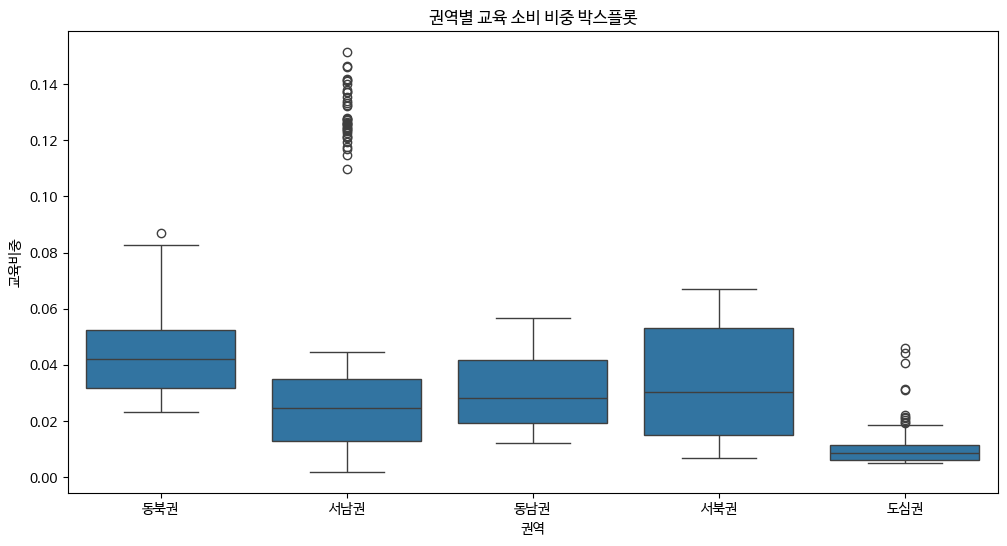

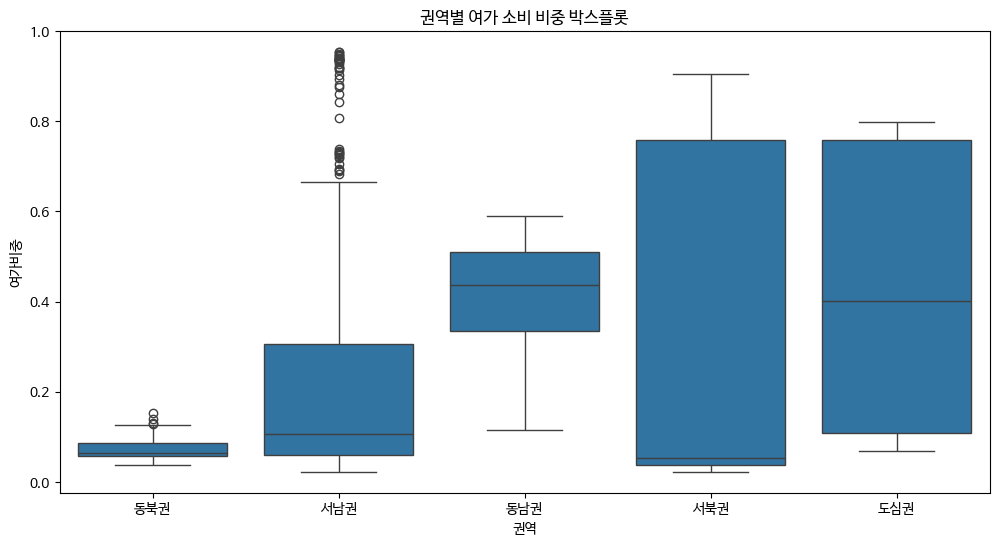

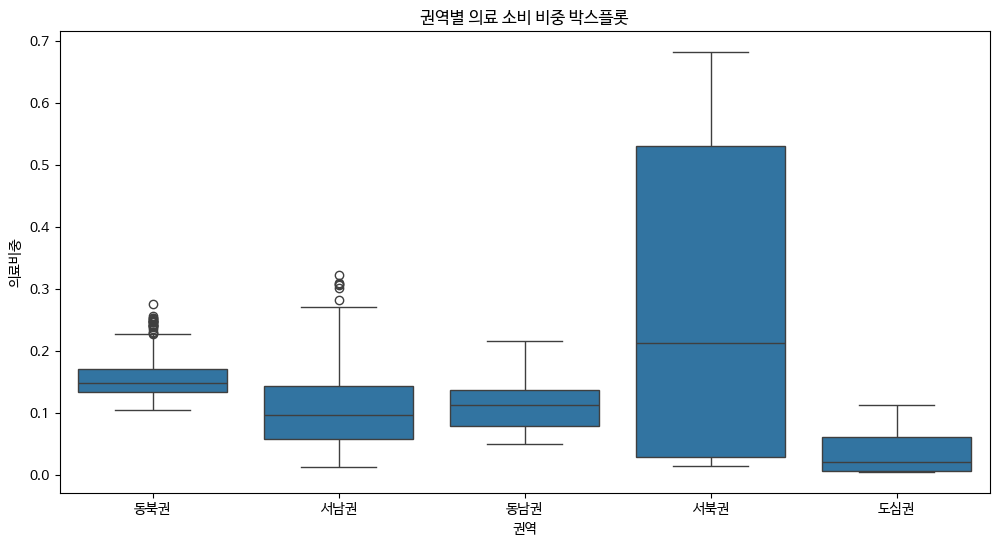

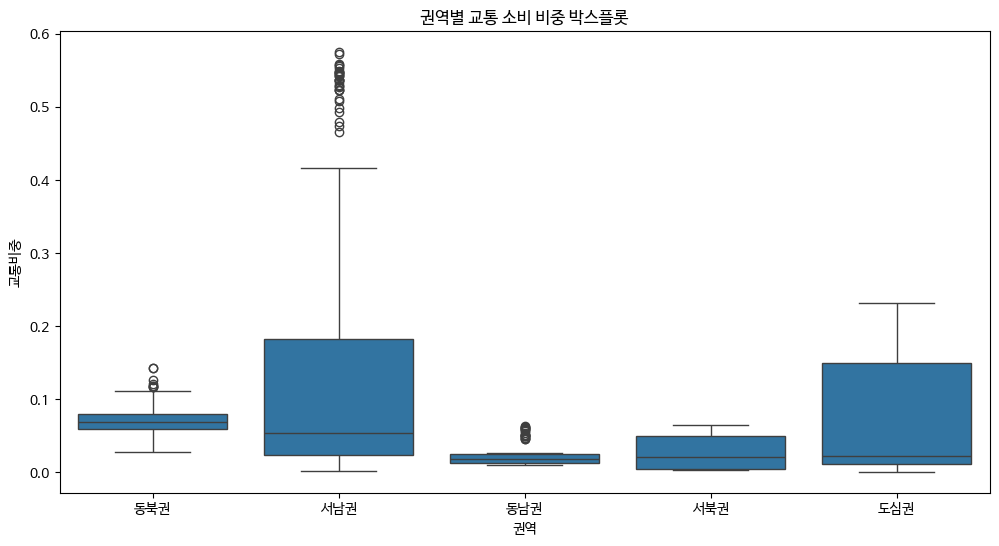

In [ ]:
# 권역별 소비 비중 시각화 - 1(박스플롯)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='권역', y='교육비중')
plt.title("권역별 교육 소비 비중 박스플롯")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='권역', y='여가비중')
plt.title("권역별 여가 소비 비중 박스플롯")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='권역', y='의료비중')
plt.title("권역별 의료 소비 비중 박스플롯")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='권역', y='교통비중')
plt.title("권역별 교통 소비 비중 박스플롯")
plt.show()

# 박스플롯을 통해 권역별 소비 비중 분포의 중심값(median), 사분위 범위(IQR), 분포의 퍼짐 정도를 직관적으로 확인
# 일부 권역에서는 교육/여가/의료/교통 비중에서 뚜렷한 차이가 나타났음
# 이는 ANOVA 분석에서 통계적으로 검증하였음

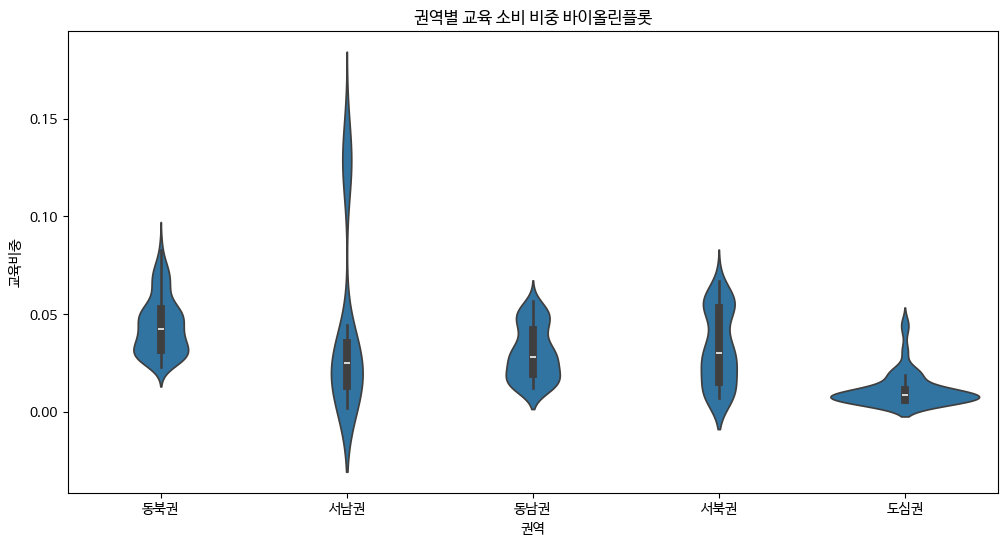

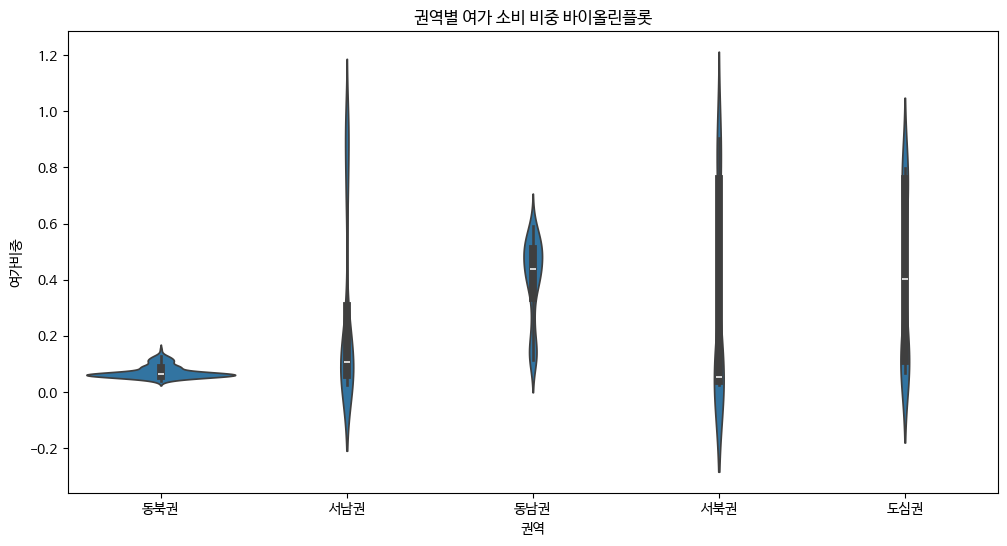

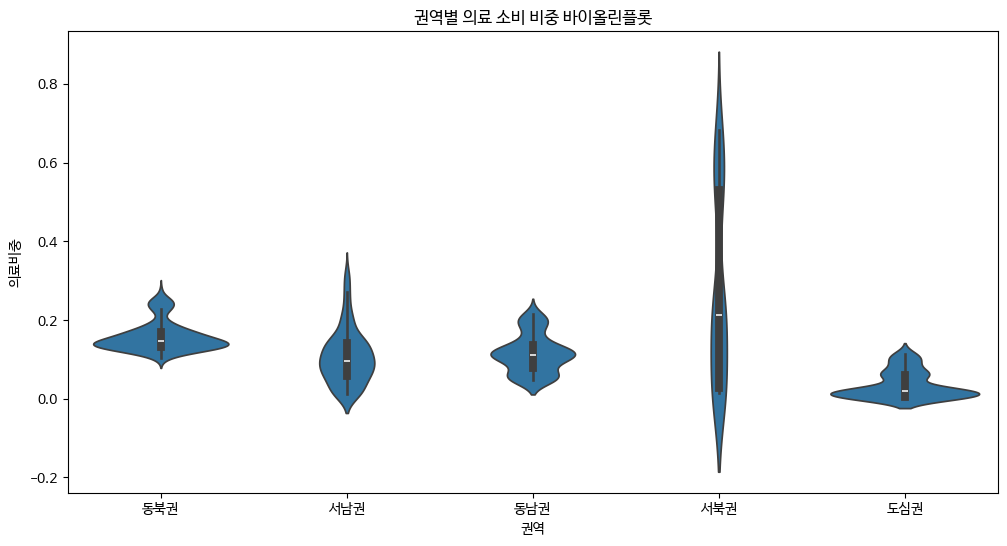

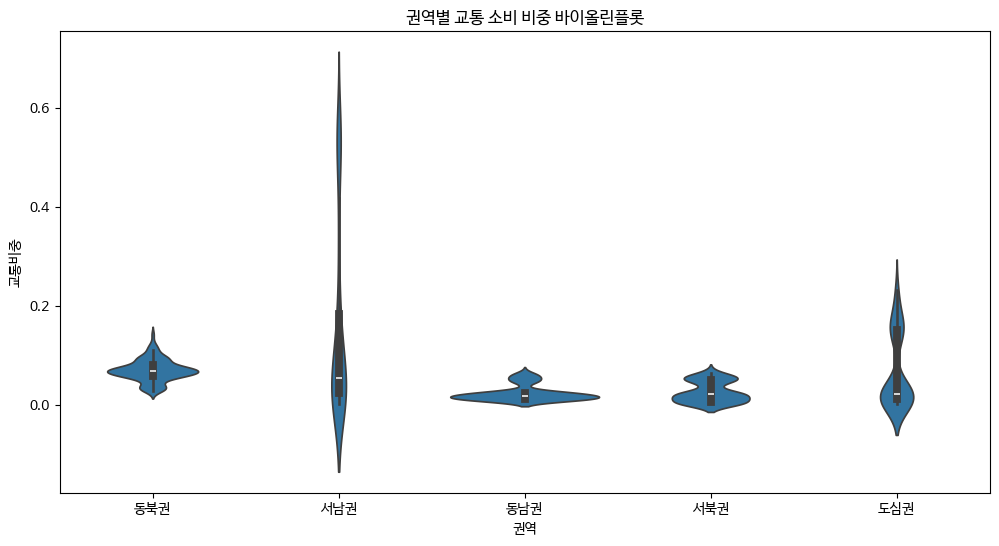

In [ ]:
# 권역별 소비 비중 시각화 - 2(바이올린플롯)
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='권역', y='교육비중')
plt.title("권역별 교육 소비 비중 바이올린플롯")
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='권역', y='여가비중')
plt.title("권역별 여가 소비 비중 바이올린플롯")
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='권역', y='의료비중')
plt.title("권역별 의료 소비 비중 바이올린플롯")
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='권역', y='교통비중')
plt.title("권역별 교통 소비 비중 바이올린플롯")
plt.show()

# 바이올린플롯은 각 권역의 소비 비중 분포 형태(밀도)를 시각적으로 보여줌
#ㅋ
# 이는 지역별 소비 패턴 차이를 이해하는 데 중요한 시각적 근거를 제공함

In [ ]:
# 1) 교육비중 ANOVA
import statsmodels.api as sm
import statsmodels.formula.api as smf

EduFit = smf.ols(formula='교육비중 ~ C(권역)', data=df).fit()
print(EduFit.summary())

print(sm.stats.anova_lm(EduFit, typ=3))

                            OLS Regression Results                            
Dep. Variable:                   교육비중   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     24.45
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           7.33e-19
Time:                        05:56:43   Log-Likelihood:                 1419.8
No. Observations:                 650   AIC:                            -2830.
Df Residuals:                     645   BIC:                            -2807.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0115      0.003      3.720   

In [ ]:
# 2) 여가비중 ANOVA
LeisureFit = smf.ols(formula='여가비중 ~ C(권역)', data=df).fit()
print(LeisureFit.summary())

print(sm.stats.anova_lm(LeisureFit, typ=3))

                            OLS Regression Results                            
Dep. Variable:                   여가비중   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     43.98
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           1.17e-32
Time:                        05:56:43   Log-Likelihood:                -9.7127
No. Observations:                 650   AIC:                             29.43
Df Residuals:                     645   BIC:                             51.81
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3911      0.028     14.010   

In [ ]:
# 3) 의료비중 ANOVA
MedicalFit = smf.ols(formula='의료비중 ~ C(권역)', data=df).fit()
print(MedicalFit.summary())

print(sm.stats.anova_lm(MedicalFit, typ=3))

                            OLS Regression Results                            
Dep. Variable:                   의료비중   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     70.62
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           1.34e-49
Time:                        05:56:43   Log-Likelihood:                 609.64
No. Observations:                 650   AIC:                            -1209.
Df Residuals:                     645   BIC:                            -1187.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0347      0.011      3.226   

In [ ]:
# 4) 교통비중 ANOVA
TrafficFit = smf.ols(formula='교통비중 ~ C(권역)', data=df).fit()
print(TrafficFit.summary())

print(sm.stats.anova_lm(TrafficFit, typ=3))

                            OLS Regression Results                            
Dep. Variable:                   교통비중   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     35.32
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           1.07e-26
Time:                        05:56:43   Log-Likelihood:                 531.44
No. Observations:                 650   AIC:                            -1053.
Df Residuals:                     645   BIC:                            -1030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0660      0.012      5.437   

In [ ]:
EduANOVA = sm.stats.anova_lm(EduFit, typ=3)
print(EduANOVA)

# 검정통계량(F)은 24.45,
# p-value는 0.000000(≈ 0.000) 으로 나타났다.
# 따라서 유의수준 0.05에서 귀무가설을 기각하며,
# 권역에 따라 교육비중의 평균에 유의미한 차이가 있다.
# 이는 권역별 상권의 교육 소비 구조가 서로 다름을 의미한다.

             sum_sq     df          F        PR(>F)
Intercept  0.010347    1.0  13.840667  2.163280e-04
C(권역)      0.073116    4.0  24.449974  7.327357e-19
Residual   0.482210  645.0        NaN           NaN


In [ ]:
LeisureANOVA = sm.stats.anova_lm(LeisureFit, typ=3)
print(LeisureANOVA)
# F = 43.98
# p-value = 0.000000
# p < 0.05 이므로 귀무가설 기각.
# 권역 간 여가비중 평균은 통계적으로 유의하게 다르다.

              sum_sq     df           F        PR(>F)
Intercept  11.933369    1.0  196.292969  3.965989e-39
C(권역)      10.694651    4.0   43.979298  1.167468e-32
Residual   39.211914  645.0         NaN           NaN


In [ ]:
MedicalANOVA = sm.stats.anova_lm(MedicalFit, typ=3)
print(MedicalANOVA)
# F = 70.62
# p-value = 0.000000
# → 귀무가설 기각
# 권역 간 의료비중 평균에 매우 유의한 차이가 있다.

             sum_sq     df          F        PR(>F)
Intercept  0.094087    1.0  10.406594  1.319143e-03
C(권역)      2.553820    4.0  70.617236  1.335241e-49
Residual   5.831486  645.0        NaN           NaN


In [ ]:
TrafficANOVA = sm.stats.anova_lm(TrafficFit, typ=3)
print(TrafficANOVA)
# F = 35.32
# p-value = 0.000000
# → 귀무가설 기각
# 권역별 교통비중 평균은 서로 다르다.

             sum_sq     df          F        PR(>F)
Intercept  0.339910    1.0  29.556030  7.714144e-08
C(권역)      1.624729    4.0  35.318558  1.073567e-26
Residual   7.417842  645.0        NaN           NaN


In [ ]:
# p-value = 0.000000 (실제로는 매우 작은 값)
# 이 말은 → p < 0.0001 수준으로 매우 유의미한 차이가 존재한다는 뜻
# 즉, 권역마다 소비 항목 비중이 확실하게 다르다는 의미
# 연구 주제:"서울 5대 권역은 상권 특성이 다르기 때문에 소비 항목 비중도 구조적으로 다를 것이다.”
# ANOVA 결과가 이 가설을 완전하게 지지

# F-statistic 값이 매우 크다
# 24.45
# 43.97
# 70.62
# 35.31
# F 값이 크다는 것은
#“집단 간 평균 차이가 집단 내부 변동보다 훨씬 크다”는 뜻
# 즉, 권역 간 소비 패턴 차이가 실제로 크다는 매우 자연스러운 결과

# 교육·여가·의료·교통 모든 소비 항목에서 서울 5대 권역 간 유의미한 차이가 존재한다(p < 0.001)
# 이건 너희 연구 가설(H₁)을 강하게 지지하는 매우 좋은 결과

# 전체 ANOVA 결론:
# 일원배치 분산분석(ANOVA) 결과, 서울 5대 권역 간 소비 항목(교육·여가·의료·교통) 비중의 평균은 모두 유의미한 차이가 있는 것으로 나타났다(p < 0.001)
# 이는 권역별 상권 특성의 차이가 실제 소비 구조에도 반영되고 있음을 의미

# 사후검정 - Tukey HSD 사후검정

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   도심권    동남권   0.0183 0.0001  0.0071  0.0295   True
   도심권    동북권   0.0327    0.0  0.0228  0.0426   True
   도심권    서남권   0.0308    0.0  0.0207   0.041   True
   도심권    서북권   0.0209    0.0  0.0089  0.0329   True
   동남권    동북권   0.0144 0.0001  0.0054  0.0234   True
   동남권    서남권   0.0125  0.002  0.0033  0.0217   True
   동남권    서북권   0.0026 0.9708 -0.0086  0.0138  False
   동북권    서남권  -0.0019 0.9616 -0.0095  0.0057  False
   동북권    서북권  -0.0118 0.0105 -0.0217 -0.0019   True
   서남권    서북권  -0.0099 0.0572 -0.0201  0.0002  False
----------------------------------------------------


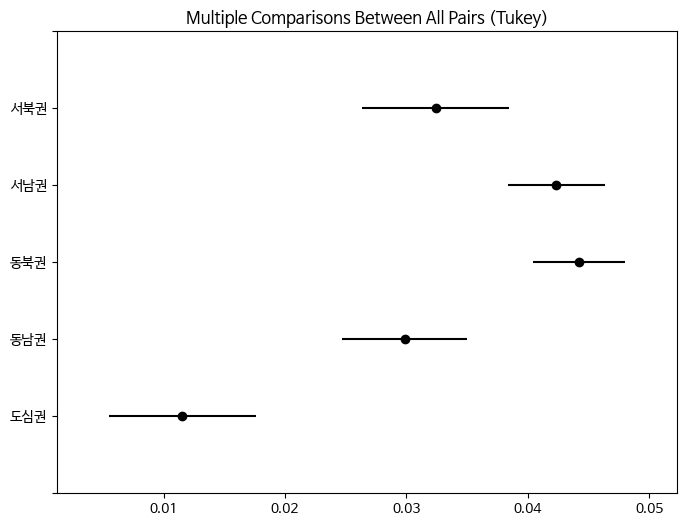

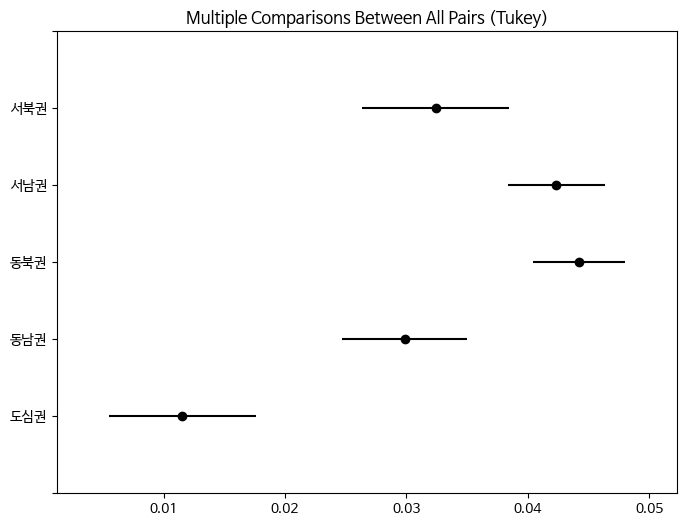

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

post_edu = pairwise_tukeyhsd(
    endog = df['교육비중'],    # 반응변수
    groups = df['권역'],        # 그룹 변수
    alpha = 0.05
)

print(post_edu)
post_edu.plot_simultaneous(figsize=(8,6))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   도심권    동남권   0.0068 0.9997 -0.0942  0.1079  False
   도심권    동북권   -0.319    0.0 -0.4085 -0.2294   True
   도심권    서남권  -0.1141  0.006 -0.2054 -0.0228   True
   도심권    서북권  -0.0957 0.1099 -0.2037  0.0123  False
   동남권    동북권  -0.3258    0.0 -0.4068 -0.2448   True
   동남권    서남권   -0.121 0.0007 -0.2039 -0.0381   True
   동남권    서북권  -0.1026 0.0445 -0.2036 -0.0016   True
   동북권    서남권   0.2048    0.0  0.1364  0.2733   True
   동북권    서북권   0.2232    0.0  0.1337  0.3128   True
   서남권    서북권   0.0184 0.9818 -0.0729  0.1097  False
----------------------------------------------------


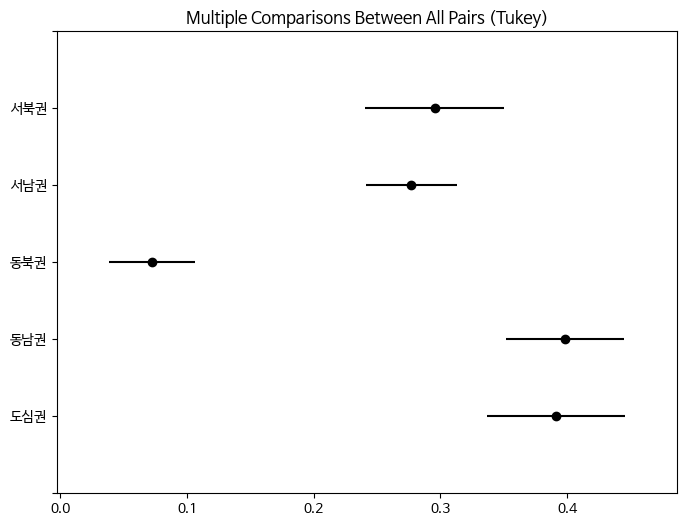

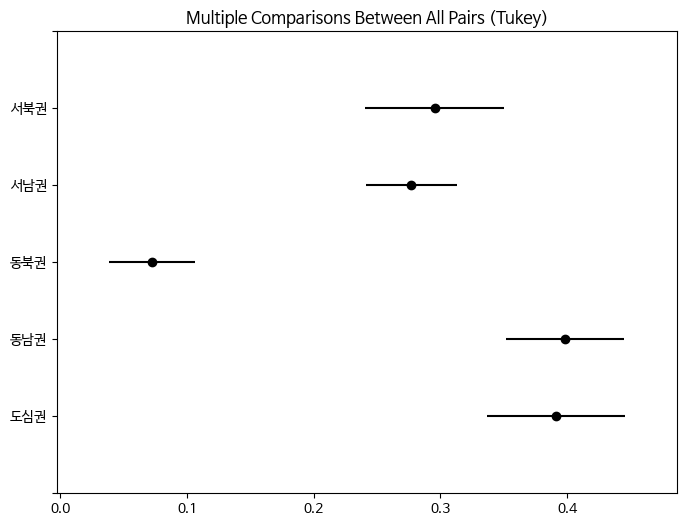

In [ ]:
post_leisure = pairwise_tukeyhsd(
    endog = df['여가비중'],
    groups = df['권역'],
    alpha = 0.05
)

print(post_leisure)
post_leisure.plot_simultaneous(figsize=(8,6))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   도심권    동남권     0.08    0.0  0.0411   0.119   True
   도심권    동북권   0.1235    0.0  0.0889   0.158   True
   도심권    서남권   0.0726    0.0  0.0374  0.1078   True
   도심권    서북권   0.2379    0.0  0.1962  0.2795   True
   동남권    동북권   0.0434 0.0015  0.0122  0.0747   True
   동남권    서남권  -0.0074 0.9698 -0.0394  0.0246  False
   동남권    서북권   0.1578    0.0  0.1189  0.1968   True
   동북권    서남권  -0.0508    0.0 -0.0772 -0.0244   True
   동북권    서북권   0.1144    0.0  0.0799  0.1489   True
   서남권    서북권   0.1652    0.0    0.13  0.2004   True
----------------------------------------------------


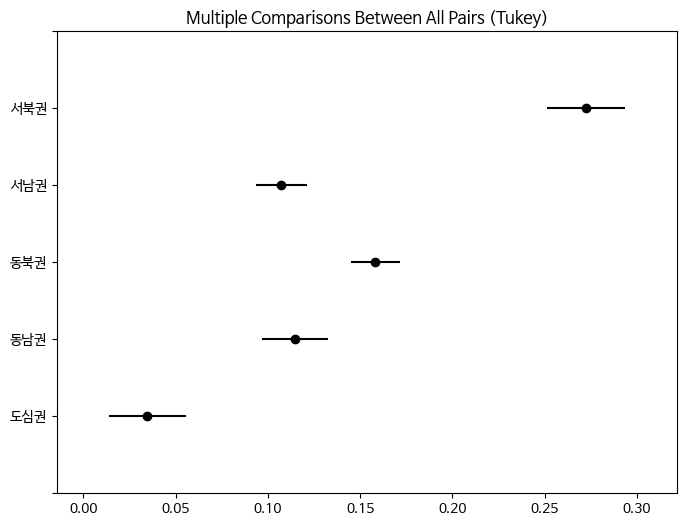

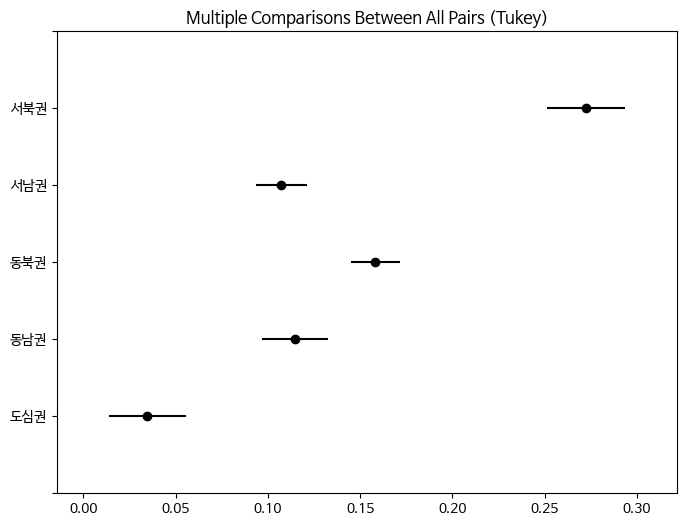

In [ ]:
post_medical = pairwise_tukeyhsd(
    endog = df['의료비중'],
    groups = df['권역'],
    alpha = 0.05
)

print(post_medical)
post_medical.plot_simultaneous(figsize=(8,6))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   도심권    동남권  -0.0423 0.0655 -0.0863  0.0016  False
   도심권    동북권   0.0037  0.999 -0.0353  0.0426  False
   도심권    서남권   0.0893    0.0  0.0496   0.129   True
   도심권    서북권  -0.0397 0.1427 -0.0867  0.0073  False
   동남권    동북권    0.046 0.0035  0.0107  0.0812   True
   동남권    서남권   0.1316    0.0  0.0956  0.1677   True
   동남권    서북권   0.0026 0.9998 -0.0413  0.0466  False
   동북권    서남권   0.0857    0.0  0.0559  0.1155   True
   동북권    서북권  -0.0433 0.0205 -0.0823 -0.0044   True
   서남권    서북권   -0.129    0.0 -0.1687 -0.0893   True
----------------------------------------------------


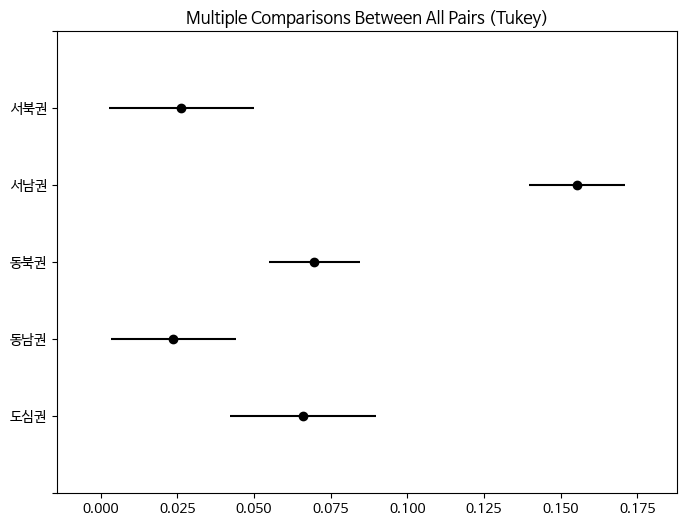

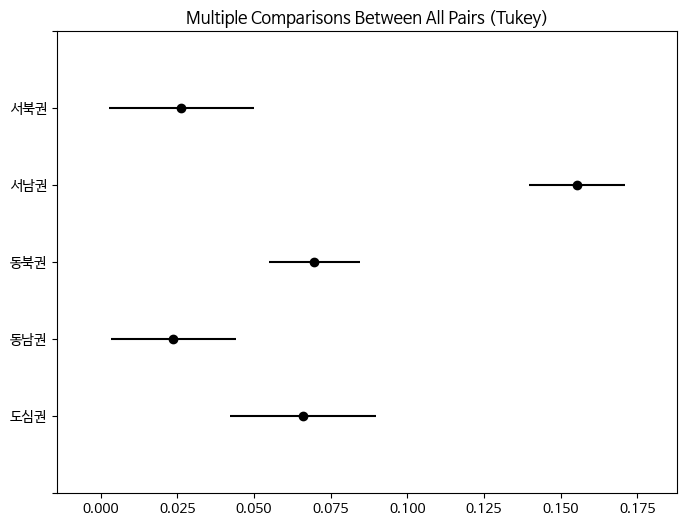

In [ ]:
post_traffic = pairwise_tukeyhsd(
    endog = df['교통비중'],
    groups = df['권역'],
    alpha = 0.05
)

print(post_traffic)
post_traffic.plot_simultaneous(figsize=(8,6))

In [ ]:
# reject = True -> 두 권역의 평균이 유의하게 다름
# reject = False -> 유의미한 차이가 없음

In [ ]:
# 1. 교육비중 Tukey 결과 해석
# 유의한 차이가 나온 권역 쌍
# 도심권 > 동남권
# 도심권 > 동북권
# 도심권 > 서남권
# 도심권 > 서북권
# 동남권 > 동북권
# 동남권 > 서남권
# 동북권 > 서북권

# 도심권이 모든 다른 권역보다 교육비중이 높음
# 서북권은 전체적으로 낮은 편
# 동남권, 동북권, 서남권도 서로 유의한 차이를 보임
# -> 교육 소비 비중은 권역 차이가 매우 뚜렷하다

In [ ]:
# 2. 여가비중 Tukey 결과 해석
# 동북권이 여가비중에서 압도적으로 높음(모든 권역과 비교해 유의하게 높음)
# 도심권, 동남권은 상대적으로 낮음(특히 동북권-도심권/ 동북권-동남권이 아주 큰차이를 보임)
# 서북권은 중간 수준
# -> 여가 소비는 동북권이 가장 높고
# 도심, 동남, 서남권이 낮은 패턴

In [ ]:
# 3. 의료비중 Tukey 결과 해석
# 의료비중은 가장 강한 차이가 나타남
# 서북권이 의료비중 최고(도심, 동남, 동북, 서남권 전부보다 유의하게 높음)
# 동남권도 동북권, 서남권보다 유의하게 높음
# 도심권도 전체적으로 높은 편
# -> 의료소비 비중은 서북권 > 동남권 > 도심권 > 기타 권역 순으로 높은 경향

In [ ]:
# 4. 교통비중 Tukey 결과 해석
# 교통비중은 다른 항목보다 차이가 비교적 작지만 여전히 유의함
# 서남권이 가장 높음(거의 모든 권역보다 유의하게 높음)
# 동남권은 교통비중이 높음(동북권, 서남권보다 높음)
# 도심권은 중간 수준
# -> 교통 소비 비중은 서남권이 가장 높고, 동남권이 그 뒤를 잇는 패턴

In [ ]:
# ANOVA에서 4개 항목 모두 p<0.001 → 권역 간 차이 강함
# Tukey에서도 다수 권역 조합에서 유의한 차이 확인됨
# 결과가 모두 서로 일관됨
# 연구 주제 “권역별 소비 구조 차이 존재”를 강하게 지지

In [ ]:
# Tukey 사후검정 결과, 교육·여가·의료·교통 모든 소비 항목에서
# 다수 권역 간 유의미한 차이가 나타났다(p < 0.05).
# 특히 도심권의 교육비중이 가장 높고, 동북권의 여가비중이 뚜렷하게 높으며,
# 서북권의 의료비중, 서남권의 교통비중이 두드러지는 등
# 서울 5대 권역의 상권 특성이 실제 소비 구조에 반영되어 있음이 확인되었다.